# Exercise 4: Convolutional Neural Networks


## Important notes

- Email: Frequently check your email address registered for Moodle. All notifications regarding the course will be sent via Moodle.
- Moodle: Please use the Moodle platform and post your questions to the forum. They will be answered by us or your fellow students.


In [7]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms as T

---
## Task 3: Convolutional Neural Networks

Now we want to move on to train our classifier on CIFAR10 with PyTorch.

### Task 3.1: Dataset

In [1]:
dataset = ...

# TODO: Plot 10 images from each class

### 3.2 Network

In [4]:
class Net(nn.Module):
    def __init__(self):
        ############ your code here ############
        pass
        
        ############ end of your code############
    
    def forward(self, x):
        ############ your code here ############

        
        ############ end of your code############
        return x

### 3.3 Training

In [5]:
# TODO

Plot how the accuracy (i.e. percentage of correctly classified images) of your model evolves for both, the training- and test-set of CIFAR10. Please make sure to add meaningful axis labels for your plot (y-axis as
the accuracy and x-axis as the epoch number).

In [6]:
# TODO

What do you observe in the accuracy plot, in particular if you compare the train and test accuracy? Do you have an explanation for that?

*TODO...*

### 3.4 Augmentation

Please apply random horizontal flipping, random cropping with padding=4, and ColorJitter to the CIFAR10 images and visualize a few pairs of augmented images against their original.

In [7]:
# TODO

Train your model using the same setup as above, however, with additional normalization (normalize your input images channel-wise using μ = 0.5 and σ = 0.5) and data augmentation.

In [8]:
# TODO

Plot the accuracy of this model and the one you trained before over time. Make sure to use proper axis labels and a meaningful legend.

In [9]:
# TODO

Based on your results, provide a brief discussion of why the extra normalization and augmentation improves/harms the performance of your model.

*TODO...*

---
## Task 4: Activation and Saliency Maps

In this task, we will try to visualize what CNNs learn by means of the activation
map, which is considered to be more informative than just visualizing e.g. the
kernel weights.

### 4.1 Instantiate a pre-traind ResNet18

In [11]:
from torchvision.models import resnet18
import torch

############ your code here ############
# Instantiate your model ResNet18
# turn the model into evaluation mode
# and print out the architecture 

# TODO
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights='DEFAULT')

model.eval()

############ end of your code############

Using cache found in /Users/krishuagarwal/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 4.2 Intermediate Activation Maps

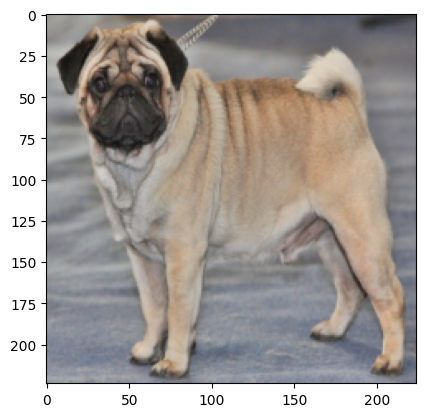

In [20]:
# check for gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# load the provided image and get the output
image = Image.open('pug.jpg')
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)

def show_tensor(tensor):
    if tensor.ndim == 4:
        temp = tensor.squeeze()
    else: temp=tensor
    plt.imshow(temp.cpu().permute(1,2,0))

show_tensor(X.squeeze())

activations_1 = []
activations_2 =[]

# Layers for extracting activations
conv_1 = model.layer3[1].conv3
conv_2 = model.layer4[1].conv2

def save_activations_1(module, input, output) : 
    activations_1.append(output)

def save_activations_2(module, input, output) : 
    activations_2.append(output)
    
conv_1.register_forward_hook(save_activations_1)
conv_2.register_forward_hook(save_activations_2)

Store intermediate activation maps..


In [22]:
with torch.no_grad() : 
    output = model(X)

### 4.3 Visualize the Activation Maps

In [ ]:
activations_1[0].shape , activations_2[0].shape # 1024 Channels and 512 Channels

activations_1_noi = activations_1[0]
activations_2_noi = activations_2[0]

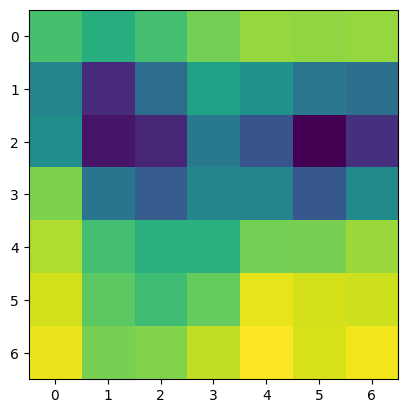

In [41]:
plt.imshow(activations_2_noi.mean(dim=1).detach().squeeze(dim = 0).numpy())

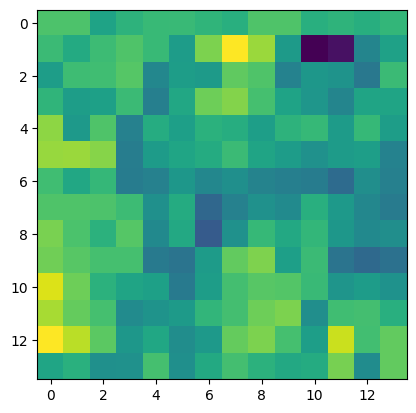

In [42]:
plt.imshow(activations_1_noi.mean(dim = 1).squeeze(dim = 0).detach().numpy())
plt.show()

### 4.4 Plot Image and Activation Map

In [18]:
############ your code here ############
# visualize one of the activation maps on top of the original image
# you may need image resampling for this and the imshow(...,alpha=)
# value to overlap images with transparency.

############ end of your code############

### 4.5 Saliency Map
Introduced in: *Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps*

In [43]:
# illustrate how gather() works
def gather_example():
    N, C = 4, 5
    s = torch.randn(N, C)
    y = torch.LongTensor([1, 2, 1, 3])
    print(s)
    print(y)
    print(s.gather(1, y.view(-1, 1)).squeeze())
gather_example()

# load the images
names = ['catdog_243.png', 'catdog_243.png', 'snake_56.png', 'spider_72.png']

X = [np.array(Image.open(name).convert('RGB')) for name in names]
y = [int(s.rsplit('_')[1].rsplit('.')[0]) for s in names]

# intentionally change the label to a wrong one
y[1] = 285

def preprocess(img, size=224):
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Lambda(lambda x: x[None]),  # equivalent to unsqueeze()
    ])
    return transform(img)

tensor([[-0.3215, -0.0295,  0.1296,  0.7912, -0.7704],
        [-0.6218,  0.0606, -2.7900, -0.9405, -1.6083],
        [ 0.6827,  0.9230,  1.8964, -2.2999,  0.5197],
        [-0.9605, -0.2021,  1.5455,  2.1408, -0.0840]])
tensor([1, 2, 1, 3])
tensor([-0.0295, -2.7900,  0.9230,  2.1408])


#### a) Complete the saliency map function.

In [21]:
def saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; LongTensor of shape (N,)
    - model: A pretrained CNN that will be used to compute the saliency map.

    Returns:
    - saliency: A Tensor of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    # Make sure the model is in "test" mode
    model.eval()
    
    # Wrap the input tensors in Variables
    X_var = X.clone().detach()
    X_var.requires_grad = True
    y_var = y.clone().detach()
    saliency = None

    ##############################################################################
    # TODO: Implement this function. Perform a forward and backward pass through #
    # the model to compute the gradient of the correct class score with respect  #
    # to each input image. You first want to compute the loss over the correct   #
    # scores, and then compute the gradients with a backward pass.               #
    ##############################################################################
    
    # TODO

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return saliency

#### b) Visualize the original images together with the saliency maps.

Visualize the original image with the saliency maps together and provide a short discussion on why different ground truth labels with even the same input image would yield different saliency maps, for instance, the catdog_243.png image with y = 243 (bull mastiff) and y = 285 (Egyptian cat).

In [87]:
# Please use the same pre-trained network from the previous task for this task
model = None

# if you finished the task 3.1 and defined your model, then this function should run flawlessly
def show_saliency_maps(X, y):
    # Convert X and y from numpy arrays to Torch Tensors
    X_tensor = torch.cat([preprocess(Image.fromarray(x)) for x in X], dim=0)
    y_tensor = torch.LongTensor(y)
    # Compute saliency maps for images in X
    saliency = saliency_maps(X_tensor, y_tensor, model)

    # Convert the saliency map from Torch Tensor to numpy array and show images
    # and saliency maps together.
    saliency = saliency.numpy()
    N = len(X)
    for i in range(N):
        plt.subplot(2, N, i + 1)
        plt.imshow(X[i])
        plt.axis('off')
        plt.title('ground truth label set to {}'.format(y[i]))
        plt.subplot(2, N, N + i + 1)
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(20, 10)
    plt.show()

show_saliency_maps(X, y)

---